# Project Objective

The aim of this project is to predict the final price of each home using the Ames Housing dataset. This competition provided a valuable learning opportunity for me to delve deeper into machine learning techniques. Through this experience, I honed my skills in data processing and applied techniques gleaned from previous projects, culminating in an outcome that I find highly satisfying.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Importing data
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

train.columns = train.columns.str.replace(" ", "")
test.columns = test.columns.str.replace(" ", "")

train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# DistPlot Analysis

Upon visual inspection of the plot, it is evident that the distribution is positively skewed(skewed to the right), deviating significantly from a normal distribution. This skewness can have detrimental effects on predictive accuracy and may introduce bias into the machine learning model in later stages.
 
Employing the Shapiro-Wilk test for normality further reinforces this observation, as the obtained p-value is exceedingly small, indicating a departure from normality. Typically, a conventional threshold of 0.05 is used to determine whether the p-value is considered small. In this case, the p-value is practically zero, hence the null hypothesis will be rejected. Addressing this skewness issue will be crucial, and one potential approach could involve applying a normalization technique to the data.



C:\Users\NicholasTeng\AppData\Local\Temp\ipykernel_21120\1405735696.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["SalePrice"],fit=norm)
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert i

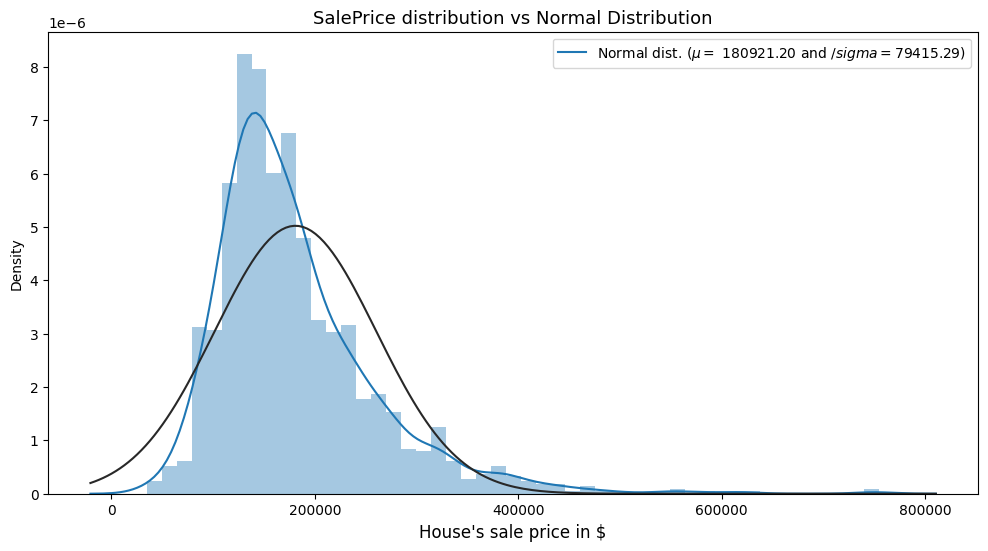

In [4]:
#Exploratory Data Analysis and Visualisation

(mu, sigma) = norm.fit(train["SalePrice"])
plt.figure(figsize = (12,6))

sns.distplot(train["SalePrice"],fit=norm)

plt.title("SalePrice distribution vs Normal Distribution", fontsize = 13)
plt.xlabel("House's sale price in $", fontsize = 12)
plt.legend(["Normal dist. ($\mu=$ {:.2f} and $/sigma=${:.2f})".format(mu, sigma)], loc = "best")
plt.show()

In [5]:
# Skew and kurt
from scipy import stats

shap_t,shap_p = stats.shapiro(train['SalePrice'])

print("Shapiro Test Statistic: %f" % shap_t)
print("Shapiro P value: %f" % shap_p)

Shapiro Test Statistic: 0.869673
Shapiro P value: 0.000000


# Correlation Matrix Analysis
The Correlation Matrix serves as a crucial tool in identifying the features that exert the most significant influence on a house's sales price. By leveraging this insight, we can strategically select features for constructing the ML model, resulting in a reduction of noise and an improvement in accuracy. These influential features will also be subjected to a more comprehensive examination.

However, it's worth noting that even features with weaker correlations can be leveraged to generate additional variables that may still offer meaningful contributions to the model.

Upon analyzing the Correlation Matrix, it becomes evident that features such as OverallQual (0.79), GrLivArea (0.71), 1stFlrSF (0.61), GarageCars (0.64), FullBath (0.61), and YearBuilt (0.52) exhibit the highest correlations with SalesPrice. These will play a pivotal role in training the ML model.

As for the exclusion of certain features like GarageArea, the rationale lies in the assumption that its correlation primarily stems from the number of cars it can accommodate, a relationship already captured by GarageCars. Given the higher correlation of GarageCars, it takes precedence to avoid potential overfitting to the garage aspect. A similar logic applies to the choice between BsmtSF and 1stFlrSF. Nevertheless, these excluded features can still be valuable in subsequent stages of feature engineering.

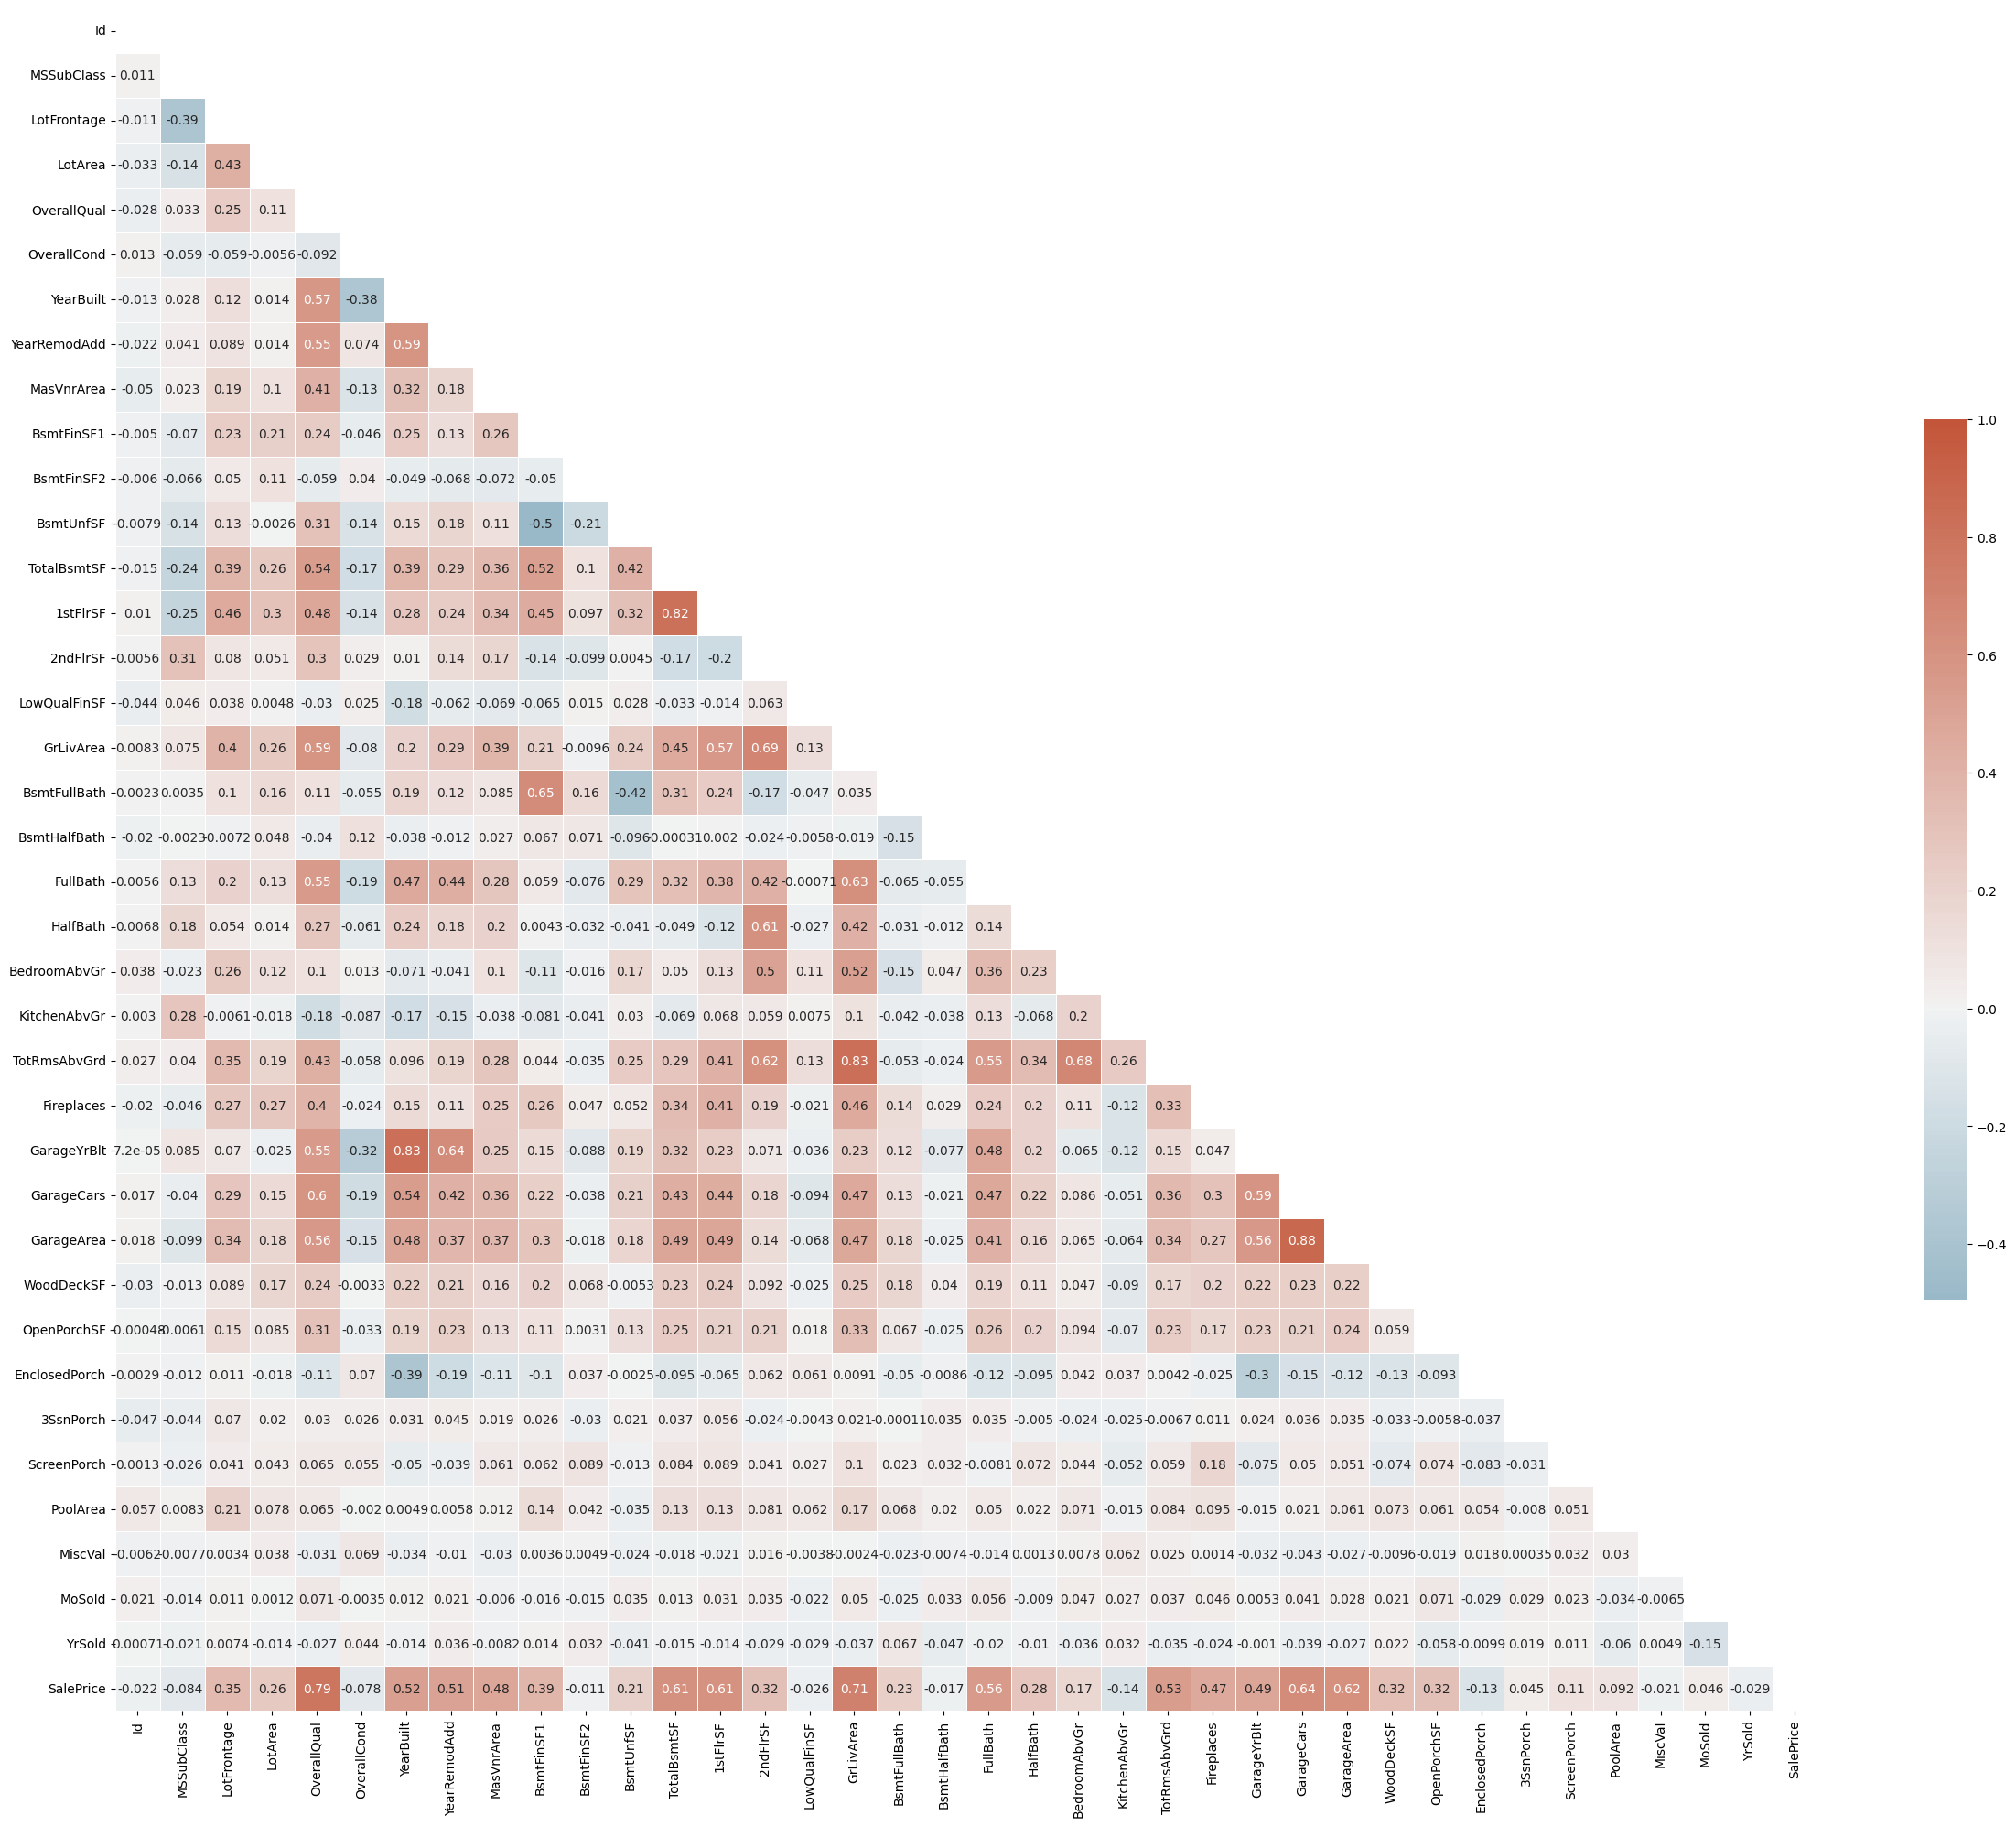

In [6]:
#Correlation Matrix
f, ax = plt.subplots(figsize=(30, 25))
numeric_data = train.select_dtypes(include=['number'])
mat = numeric_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Selected Feaures Plot

The chosen features are visualized to gain a deeper understanding of their correlation with SalePrice and to identify any noteworthy anomalies. Base on the plots, no anomalies are discoverd.

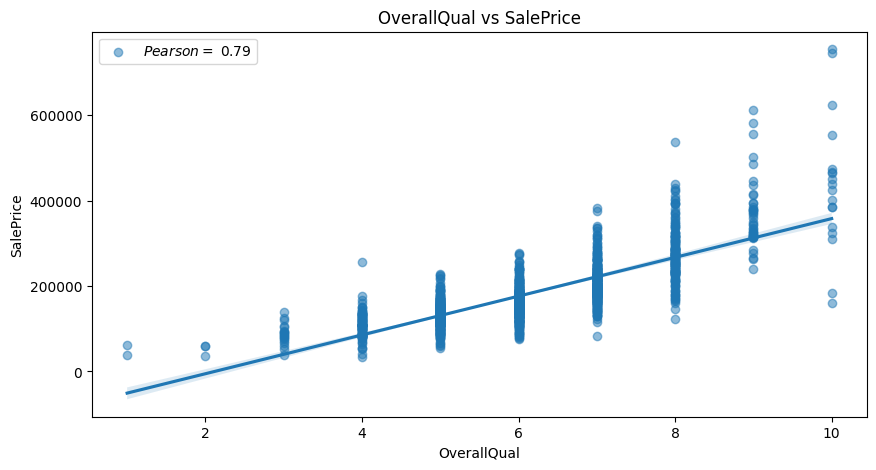

In [7]:
Pearson_OverallQual = 0.79
plt.figure(figsize = (10,5))
sns.regplot(data=train, x = 'OverallQual', y='SalePrice', scatter_kws={'alpha':0.5}, order =1 )
plt.title('OverallQual vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_OverallQual)], loc = 'best')
plt.show()

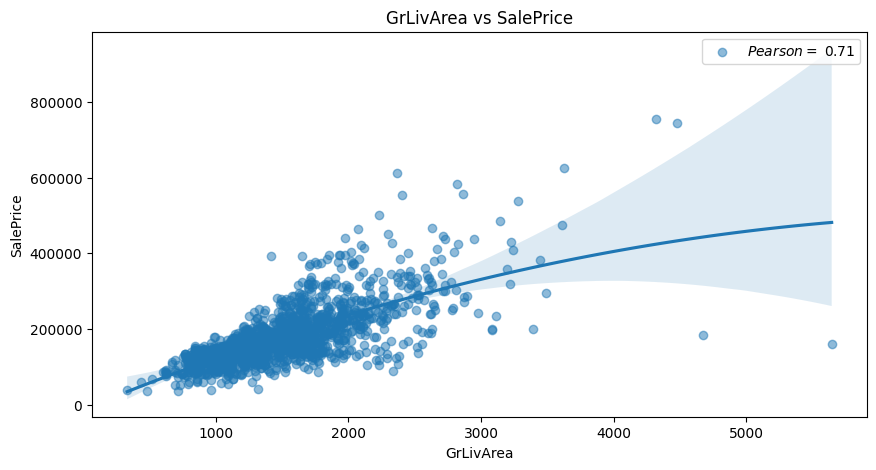

In [8]:
Pearson_GrLiv = 0.71
plt.figure(figsize = (10,5))
sns.regplot(data=train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.5}, order =2 )
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

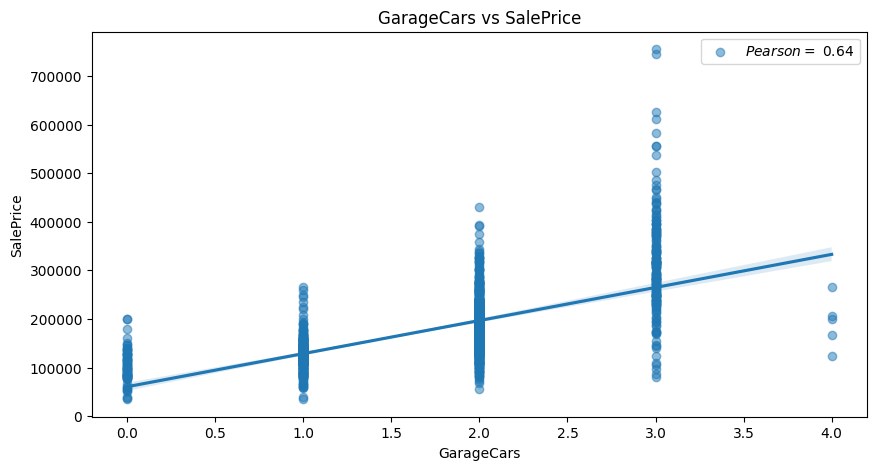

In [9]:
Pearson_GarageCars = 0.64
plt.figure(figsize = (10,5))
sns.regplot(data=train, x = 'GarageCars', y='SalePrice', scatter_kws={'alpha':0.5}, order =1 )
plt.title('GarageCars vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GarageCars)], loc = 'best')
plt.show()

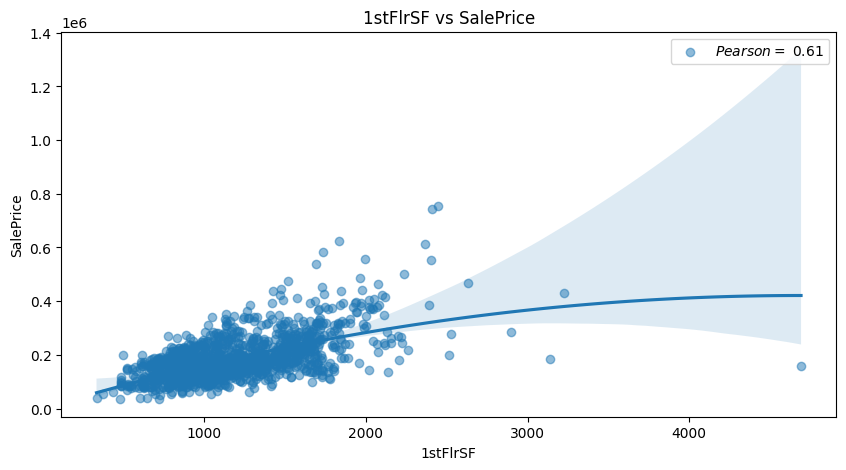

In [10]:
Pearson_1stFlrSF = 0.61
plt.figure(figsize = (10,5))
sns.regplot(data=train, x = '1stFlrSF', y='SalePrice', scatter_kws={'alpha':0.5}, order =2 )
plt.title('1stFlrSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_1stFlrSF)], loc = 'best')
plt.show()

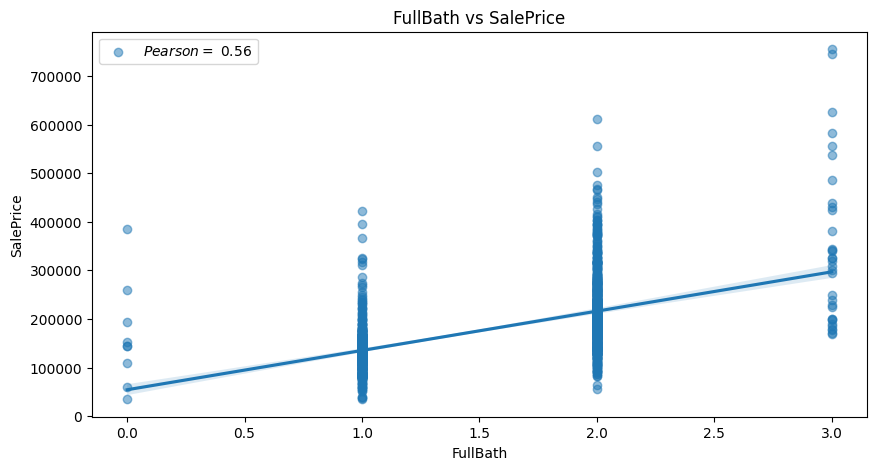

In [11]:
Pearson_FullBath = 0.56
plt.figure(figsize = (10,5))
sns.regplot(data=train, x = 'FullBath', y='SalePrice', scatter_kws={'alpha':0.5}, order =1 )
plt.title('FullBath vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_FullBath)], loc = 'best')
plt.show()

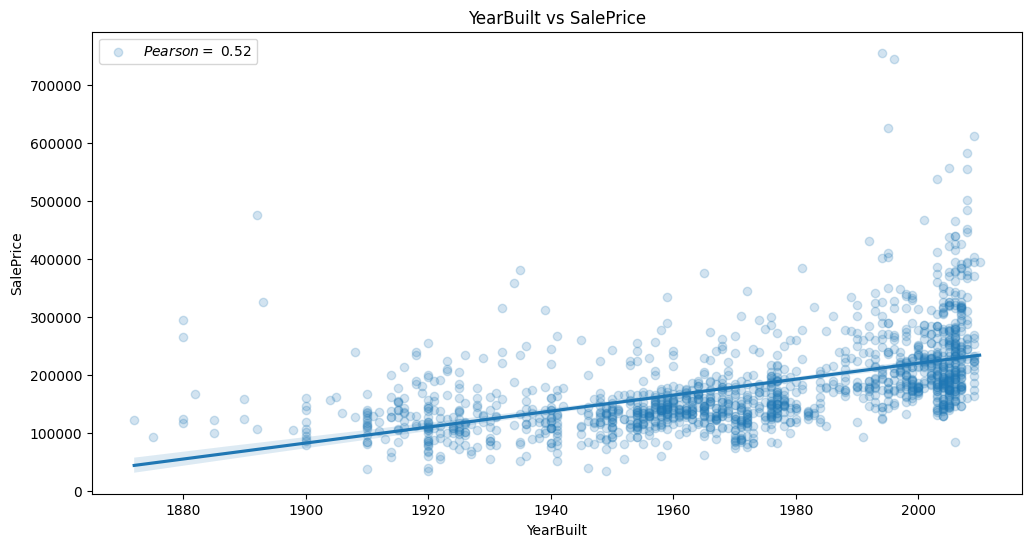

In [12]:
Pearson_YrBelt = 0.52
plt.figure(figsize=(12,6))
sns.regplot(data=train, x = "YearBuilt", y="SalePrice", scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBelt)], loc = 'best')
plt.show()

# Data Processing

After finding the useful attributes. Before that, the train and test sets are concatenated so as to use the dataset "train_test". This is to clean both the trianing and testing data sets consistently, to prevent issues with the data shape, type and formats if they are cleaned separately.

Main steps of preprocessing are:

1. Looking for potential NaN
2. Dealing with categorical features (e.g. Dummy coding)
3. Normalisation

In [13]:
#Separating Target and Features
#Try and do this, but with only training and testing data. Try and omit the main Housing AMV data stuff
target =train['SalePrice']
test_id = test['Id']
train_id = train['Id']
test = test.drop(['Id'], axis=1)
train_modified = train.drop(['SalePrice','Id'], axis=1)


#Concateenating train & trst set

train_test = pd.concat([train_modified,test], axis=0, sort=False)
train_test.reset_index(drop=True, inplace=True)
train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# 1. Looking for potential NaN sets

The number of NaN values within each column is summed up, and then found as a percentage of number of rows. If the NaN percentage exceeds 20%, it is deemed as non usable, even for feture engineering since attempting to fill the data up to make it usable, would likely lead the entire column to be too inaccurate. 

The features FireplaceQu, MasVnrType, Fence, Alley, MiscFeature, PoolQC	exceed the 20% threshold and hence, will be discarded.

In [14]:
# Looking at NaN % within the data
# This is quite useful, take note of this!

nan = pd.DataFrame(train_test.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/train_test.shape[0])*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan



,NaN_sum,feat,Perc(%),Usability
TotalBsmtSF,1,TotalBsmtSF,0.034258,Keep
GarageArea,1,GarageArea,0.034258,Keep
GarageCars,1,GarageCars,0.034258,Keep
KitchenQual,1,KitchenQual,0.034258,Keep
Electrical,1,Electrical,0.034258,Keep
BsmtUnfSF,1,BsmtUnfSF,0.034258,Keep
BsmtFinSF2,1,BsmtFinSF2,0.034258,Keep
BsmtFinSF1,1,BsmtFinSF1,0.034258,Keep
SaleType,1,SaleType,0.034258,Keep
Exterior1st,1,Exterior1st,0.034258,Keep


# Revisiting Discarded Features

Upon initial examination, the mentioned features seemed candidates for removal due to empty data. However, a closer look reveals that these empty entries signify the absence of the respective feature. For instance, a missing 'PoolQC' value implies the house lacks a pool. Thus, these apparent gaps can be appropriately filled with 'NA' to accurately represent the absence of the feature.

<Axes: >

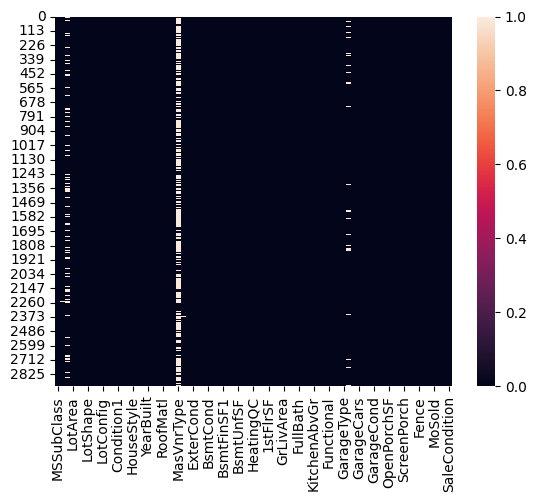

In [15]:
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)

# Filling Categorical NaN (Filling based on description file)
train_test['Functional'] = train_test['Functional'].fillna('Typ') #Typ = Typical Functionality
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr") #SBrkr = Standard Circuit Breakers & Romex
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA") #TA = Typical

for col in ['Exterior1st','Exterior2nd','SaleType']:
    train_test[col] = train_test[col].fillna(train_test[col].mode()[0])

for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')
    
for col in ['PoolQC', 'Alley', 'FireplaceQu', 'Fence','MiscFeature']:
    train_test[col] = train_test[col].fillna('None')

sns.heatmap(train_test.isna())
#The LotArea, MasVnrType and GarageCars show that they are NA, but they are actually non na.

# Utilizing KnnRegressor for imputation for numerical features

In [16]:
# Removing the useless variables

useless = ['GarageYrBlt','YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

# Imputing with KnnRegressor (we can also use different Imputers)

def impute_knn(df):
    ttn = df.select_dtypes(include=[np.number])
    ttc = df.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan
   

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna(subset=[col])          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        # use the elbow technique to go and find out the number of neighbours to use. Migt not be 5
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])     #1st arg provies the features, 2nd arg is the target.
        #Revise K neighbours to get a better understanding as to how this works!
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc],axis=1)

# Note that this is using K neighbours to fill up missing data, quite cool
train_test = impute_knn(train_test)


objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

# # Checking NaN presence

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print("NaN present")
        print(train_test[col][0])



# Feature Engineering

This phase is dedicated to crafting novel features by leveraging existing ones. By strategically combining available attributes, we aim to enhance the model's performance. The goal is to generate features that exhibit a substantial correlation with the Sales Price, ultimately refining the predictive capabilities of the model.

In [17]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

# Converting non-numeric predictors stored as numbers into string
# This is done to make it clear that they are categorical variables, and would not be interpreted as ordinal variables which would lead to incorrect results
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)
# Creating dummy variables from categorical features
# Creates new columns and fills up with 1s or 0s, based on the category it has.
#AKA One Hot Encoding



# Extracting the Top 50 Features

In an effort to mitigate overfitting and optimize computational resources, I've chosen to focus on the 50 features with the highest correlation. It's worth noting that I initially trained the model using the entire set of features, and observed that the final result differed only marginally (approximately 1%) compared to using just the top 50 features. This approach allows for a more efficient and streamlined modeling process.

In [18]:
train_new = train_test.iloc[:1460].copy()  # Using iloc to select first 1460 rowstrain_new["SalesPrice"] = target
train_new["SalesPrice"] = target

train_new_dummy = pd.get_dummies(train_new)
train_new_dummy = train_new_dummy.astype(int)
correlations = train_new_dummy.corr()['SalesPrice'].abs()

# Step 2: Sort correlations in descending order
top_features = correlations.sort_values(ascending=False)

# Step 3: Select the top 10 features
top_10_features = top_features[1:51].index.tolist()  # Exclude target variable and take top 10

# # Create a new DataFrame with only the top 10 features
# df_top_10 = train_new_dummy[top_10_features].copy()
# df_top_10
top_10_features

['OverallQual',
 'HighQualSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'Total_Home_Quality',
 'ExterQual_TA',
 'Total_Bathrooms',
 'SqFtPerRoom',
 'FullBath',
 'BsmtQual_Ex',
 'TotRmsAbvGrd',
 'YearBuilt',
 'KitchenQual_TA',
 'KitchenQual_Ex',
 'Foundation_PConc',
 'MasVnrArea',
 'FireplaceQu_None',
 'Fireplaces',
 'ExterQual_Gd',
 'BsmtQual_TA',
 'ExterQual_Ex',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'GarageFinish_Fin',
 'GarageFinish_Unf',
 'Neighborhood_NridgHt',
 'BsmtFinSF1',
 'MSSubClass_60',
 'MasVnrType_None',
 'SaleType_New',
 'GarageType_Detchd',
 'LotFrontage',
 'SaleCondition_Partial',
 'Foundation_CBlock',
 'FireplaceQu_Gd',
 'GarageType_Attchd',
 'MasVnrType_Stone',
 'Neighborhood_NoRidge',
 'WoodDeckSF',
 'KitchenQual_Gd',
 '2ndFlrSF',
 'OpenPorchSF',
 'HeatingQC_TA',
 'BsmtExposure_Gd',
 'Exterior2nd_VinylSd',
 'Exterior1st_VinylSd',
 'MSZoning_RM']

In [19]:
train_test_dummy = pd.get_dummies(train_test)
#But how to tell if the feature engineering will actually help?
# Fetch all numeric features
#train_test_dummy.to_csv("yeehaw.csv", index=False)
train_test_dummy = train_test_dummy.astype(int)
train_test_dummy = train_test_dummy[top_10_features].copy()
train_test_dummy


,OverallQual,HighQualSF,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,Total_Home_Quality,ExterQual_TA,Total_Bathrooms,...,Neighborhood_NoRidge,WoodDeckSF,KitchenQual_Gd,2ndFlrSF,OpenPorchSF,HeatingQC_TA,BsmtExposure_Gd,Exterior2nd_VinylSd,Exterior1st_VinylSd,MSZoning_RM
0,7,1710,1710,2,548,856,856,12,0,3,...,0,0,1,854,61,0,0,1,1,0
1,6,1262,1262,2,460,1262,1262,14,1,2,...,0,298,0,0,0,0,1,0,0,0
2,7,1786,1786,2,608,920,920,12,0,3,...,0,0,1,866,42,0,0,1,1,0
3,7,1717,1717,3,642,756,961,12,1,2,...,0,0,1,756,35,0,0,0,0,0
4,8,2198,2198,3,836,1145,1145,13,0,3,...,1,192,1,1053,84,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,1092,1092,0,0,546,546,11,1,1,...,0,0,0,546,0,0,0,0,0,1
2915,4,1092,1092,1,286,546,546,9,1,1,...,0,0,0,546,24,1,0,0,0,1
2916,5,1224,1224,2,576,1224,1224,12,1,2,...,0,474,0,0,0,0,0,1,1,0
2917,5,970,970,0,0,912,970,10,1,1,...,0,80,0,0,32,1,0,0,0,0


In [20]:
#train_test['Id'] = train_test['Id'].apply(str)
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
#features with high skewness are likely to have more pronounced asymmetry in their distributions
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
print("high Skew: ", high_skew)

# Normalize skewed features using log_transformation
    
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

high Skew:  Neighborhood_NoRidge     6.175565
ExterQual_Ex             4.931372
Neighborhood_NridgHt     3.826831
KitchenQual_Ex           3.363712
SaleType_New             3.050011
SaleCondition_Partial    3.000985
MasVnrType_Stone         2.969200
BsmtQual_Ex              2.900157
BsmtExposure_Gd          2.771374
MasVnrArea               2.600739
OpenPorchSF              2.535114
MSZoning_RM              1.879553
WoodDeckSF               1.842433
MSSubClass_60            1.523755
1stFlrSF                 1.469604
BsmtFinSF1               1.425420
LotFrontage              1.356283
GrLivArea                1.269358
HighQualSF               1.252036
GarageFinish_Fin         1.177550
TotalBsmtSF              1.162764
FireplaceQu_Gd           1.124925
GarageType_Detchd        1.054102
BsmtFinType1_GLQ         0.921036
HeatingQC_TA             0.906468
SqFtPerRoom              0.894856
2ndFlrSF                 0.861675
TotRmsAbvGrd             0.758367
Fireplaces               0.733495
Ex

# Performing Logarithmic transformation of Target variable

To address the positive skewness in the target variable, a logarithmic transformation is applied. This transformation stabilizes the variance, leading to a more consistent spread of data across different feature values. Additionally, it helps mitigate the influence of outliers and rectify skewness, resulting in a more symmetrical distribution overall.

# Q-Q Plot Analysis

The Q-Q plot provides a visual assessment of whether the logarithmic transformation has successfully led the target variable towards a normal distribution. When the plotted points closely align with a straight line, it indicates that the target closely adheres to the characteristics of a normal distribution.

Following the Q-Q plot analysis, it is evident that the logarithmic transformation has significantly improved the normality of the target distribution. The points now align more closely with the expected straight line, indicating a closer fit to a normal distribution.

C:\Users\NicholasTeng\AppData\Local\Temp\ipykernel_21120\2431615365.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

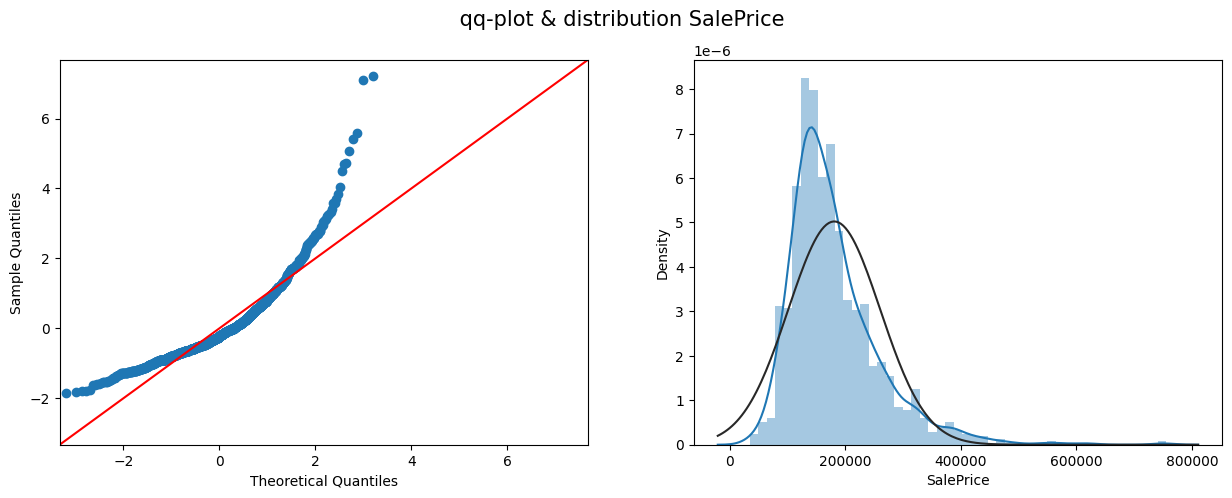

In [21]:
# SalePrice before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)
#I need to do furhter research into this, chatGPT isn't enough
sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])



sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

C:\Users\NicholasTeng\AppData\Local\Temp\ipykernel_21120\1192839978.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed 

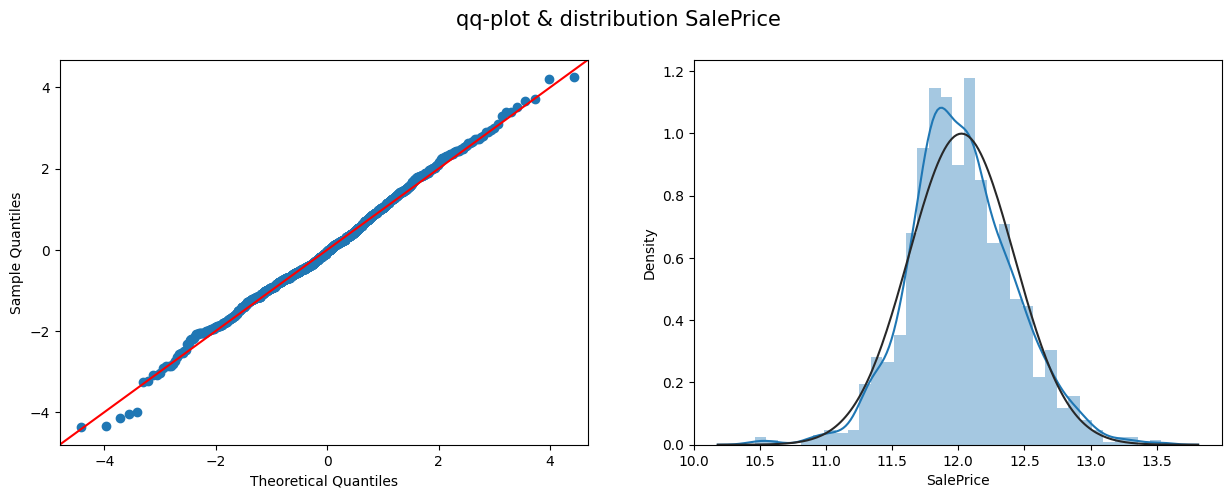

In [22]:
# SalePrice after transformation

target_log = np.log1p(target)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

#Check for skewness after doing log transformation

# Modelling Section

In [23]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
 #Learn all of these packages!


# Data Splitting for Training and Testing

After completing data cleaning and enhancing it with additional features, the next step is to divide it back into training, validation and testing sets. The validation set makes up of 20% of the orginal training set. These sets will serve as the foundation for constructing multiple machine learning modelsand validating if the model is accurate. Ultimately, the most accurate model will be selected for further analysis and implementation.

In [24]:
# Train-Test separation

train = train_test_dummy[0:1168]
validation = train_test_dummy[1168:1460] #20% of original training set
test = train_test_dummy[1460:]


In [25]:
# Creation of the RMSE metric:
new_target_log = target_log[0:1168]
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, new_target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

# Evaluating Multiple Models

In pursuit of our goal, we will employ six distinct models to construct a robust ML model. Subsequently, their outcomes will be graphically compared to ascertain the most precise model.

# Candidate Models:

    1. Linear Regression
    2. Bayesian Ridge Regression
    3. Decision Tree Regressor
    4. Random Forest Regressor
    5. Cat Boost Regressor
    6. Stacked Regressor

Among the array of ML models considered, the Cat Boost Regressor exhibits the lowest CV_RMSE (Cross-Validated Root Mean Square Error). As a result, we will further fine-tune its parameters to maximize its predictive accuracy.


In [26]:
# 10 Fold Cross validation

kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.',
                   'Dec_Tree_Reg.','Random_Forest_Reg.',
                   'Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

# l_gbm = LGBMRegressor(objective='regression')
# score_l_gbm = cv_rmse(l_gbm)
# cv_scores.append(score_l_gbm.mean())
# cv_std.append(score_l_gbm.std())

# Support Vector Regression

# svr = SVR()
# score_svr = cv_rmse(svr)
# cv_scores.append(score_svr.mean())
# cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

# xgb = xgb.XGBRegressor()
# score_xgb = cv_rmse(xgb)
# cv_scores.append(score_xgb.mean())
# cv_std.append(score_xgb.std())

# Gradient Boost Regressor

# gbr = GradientBoostingRegressor()
# score_gbr = cv_rmse(gbr)
# cv_scores.append(score_gbr.mean())
# cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                         ),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

Learning rate set to 0.041266
0:	learn: 0.3911888	total: 163ms	remaining: 2m 43s
1:	learn: 0.3805381	total: 177ms	remaining: 1m 28s
2:	learn: 0.3702046	total: 190ms	remaining: 1m 3s
3:	learn: 0.3605535	total: 202ms	remaining: 50.2s
4:	learn: 0.3510334	total: 215ms	remaining: 42.9s
5:	learn: 0.3414714	total: 228ms	remaining: 37.7s
6:	learn: 0.3328745	total: 241ms	remaining: 34.2s
7:	learn: 0.3248398	total: 253ms	remaining: 31.4s
8:	learn: 0.3166797	total: 265ms	remaining: 29.1s
9:	learn: 0.3095987	total: 277ms	remaining: 27.4s
10:	learn: 0.3025218	total: 289ms	remaining: 26s
11:	learn: 0.2951924	total: 296ms	remaining: 24.4s
12:	learn: 0.2887571	total: 302ms	remaining: 22.9s
13:	learn: 0.2825434	total: 307ms	remaining: 21.6s
14:	learn: 0.2764879	total: 311ms	remaining: 20.4s
15:	learn: 0.2703469	total: 316ms	remaining: 19.4s
16:	learn: 0.2647653	total: 319ms	remaining: 18.4s
17:	learn: 0.2590769	total: 322ms	remaining: 17.6s
18:	learn: 0.2537133	total: 325ms	remaining: 16.8s
19:	learn: 

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


7:	learn: 0.3218500	total: 88ms	remaining: 10.9s
8:	learn: 0.3138266	total: 99.5ms	remaining: 11s
9:	learn: 0.3069949	total: 111ms	remaining: 11s
10:	learn: 0.2998628	total: 123ms	remaining: 11.1s
11:	learn: 0.2925918	total: 130ms	remaining: 10.7s
12:	learn: 0.2863440	total: 136ms	remaining: 10.3s
13:	learn: 0.2804767	total: 141ms	remaining: 9.94s
14:	learn: 0.2743797	total: 145ms	remaining: 9.53s
15:	learn: 0.2684795	total: 149ms	remaining: 9.18s
16:	learn: 0.2627692	total: 153ms	remaining: 8.84s
17:	learn: 0.2569530	total: 156ms	remaining: 8.52s
18:	learn: 0.2516039	total: 159ms	remaining: 8.22s
19:	learn: 0.2464206	total: 162ms	remaining: 7.96s
20:	learn: 0.2416072	total: 165ms	remaining: 7.69s
21:	learn: 0.2371860	total: 168ms	remaining: 7.48s
22:	learn: 0.2322604	total: 171ms	remaining: 7.25s
23:	learn: 0.2282124	total: 173ms	remaining: 7.05s
24:	learn: 0.2241623	total: 176ms	remaining: 6.87s
25:	learn: 0.2197351	total: 179ms	remaining: 6.71s
26:	learn: 0.2157625	total: 182ms	rema

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.041266
0:	learn: 0.3867200	total: 7.35ms	remaining: 7.34s
1:	learn: 0.3759106	total: 12.9ms	remaining: 6.44s
2:	learn: 0.3656856	total: 19.9ms	remaining: 6.61s
3:	learn: 0.3561897	total: 26.2ms	remaining: 6.52s
4:	learn: 0.3466345	total: 32.2ms	remaining: 6.4s
5:	learn: 0.3378222	total: 39.2ms	remaining: 6.49s
6:	learn: 0.3294496	total: 45.2ms	remaining: 6.41s
7:	learn: 0.3211015	total: 51.3ms	remaining: 6.36s
8:	learn: 0.3132525	total: 57.9ms	remaining: 6.38s
9:	learn: 0.3053708	total: 63.4ms	remaining: 6.27s
10:	learn: 0.2982677	total: 69.9ms	remaining: 6.29s
11:	learn: 0.2908578	total: 75.8ms	remaining: 6.24s
12:	learn: 0.2844955	total: 80.5ms	remaining: 6.11s
13:	learn: 0.2784457	total: 85.6ms	remaining: 6.03s
14:	learn: 0.2723607	total: 89.2ms	remaining: 5.86s
15:	learn: 0.2665751	total: 92.7ms	remaining: 5.7s
16:	learn: 0.2606468	total: 95.7ms	remaining: 5.54s
17:	learn: 0.2553387	total: 98.8ms	remaining: 5.39s
18:	learn: 0.2500518	total: 102ms	remaining: 5

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.041266
0:	learn: 0.3913992	total: 4.04ms	remaining: 4.04s
1:	learn: 0.3809607	total: 7.27ms	remaining: 3.63s
2:	learn: 0.3706631	total: 10.5ms	remaining: 3.48s
3:	learn: 0.3612552	total: 13.8ms	remaining: 3.44s
4:	learn: 0.3518786	total: 17.6ms	remaining: 3.5s
5:	learn: 0.3427332	total: 20.9ms	remaining: 3.46s
6:	learn: 0.3344399	total: 24.2ms	remaining: 3.44s
7:	learn: 0.3263534	total: 27.5ms	remaining: 3.41s
8:	learn: 0.3182944	total: 31.2ms	remaining: 3.43s
9:	learn: 0.3111749	total: 35ms	remaining: 3.46s
10:	learn: 0.3043557	total: 38.5ms	remaining: 3.46s
11:	learn: 0.2967908	total: 41.8ms	remaining: 3.44s
12:	learn: 0.2901207	total: 45.2ms	remaining: 3.43s
13:	learn: 0.2833194	total: 49.2ms	remaining: 3.47s
14:	learn: 0.2771679	total: 52.6ms	remaining: 3.46s
15:	learn: 0.2708893	total: 55.9ms	remaining: 3.44s
16:	learn: 0.2652855	total: 59.3ms	remaining: 3.43s
17:	learn: 0.2595160	total: 62.7ms	remaining: 3.42s
18:	learn: 0.2542215	total: 66.5ms	remaining: 3

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.041266
0:	learn: 0.3899141	total: 11.9ms	remaining: 11.9s
1:	learn: 0.3790543	total: 22.3ms	remaining: 11.2s
2:	learn: 0.3687345	total: 33.4ms	remaining: 11.1s
3:	learn: 0.3592260	total: 45.3ms	remaining: 11.3s
4:	learn: 0.3497841	total: 56.2ms	remaining: 11.2s
5:	learn: 0.3407699	total: 67ms	remaining: 11.1s
6:	learn: 0.3326407	total: 77.3ms	remaining: 11s
7:	learn: 0.3245534	total: 88.5ms	remaining: 11s
8:	learn: 0.3163693	total: 99.2ms	remaining: 10.9s
9:	learn: 0.3092750	total: 110ms	remaining: 10.9s
10:	learn: 0.3024916	total: 122ms	remaining: 11s
11:	learn: 0.2958863	total: 129ms	remaining: 10.7s
12:	learn: 0.2892871	total: 135ms	remaining: 10.3s
13:	learn: 0.2824875	total: 140ms	remaining: 9.88s
14:	learn: 0.2764923	total: 144ms	remaining: 9.47s
15:	learn: 0.2705802	total: 149ms	remaining: 9.14s
16:	learn: 0.2646424	total: 152ms	remaining: 8.78s
17:	learn: 0.2589015	total: 155ms	remaining: 8.44s
18:	learn: 0.2533906	total: 158ms	remaining: 8.14s
19:	learn:

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


12:	learn: 0.2861656	total: 42.9ms	remaining: 3.26s
13:	learn: 0.2801024	total: 45.8ms	remaining: 3.22s
14:	learn: 0.2740416	total: 48.9ms	remaining: 3.21s
15:	learn: 0.2680140	total: 51.6ms	remaining: 3.17s
16:	learn: 0.2625104	total: 54.2ms	remaining: 3.13s
17:	learn: 0.2573424	total: 57.4ms	remaining: 3.13s
18:	learn: 0.2521090	total: 60.1ms	remaining: 3.1s
19:	learn: 0.2467521	total: 63.2ms	remaining: 3.09s
20:	learn: 0.2418284	total: 65.8ms	remaining: 3.07s
21:	learn: 0.2371755	total: 68.5ms	remaining: 3.05s
22:	learn: 0.2322278	total: 71.2ms	remaining: 3.02s
23:	learn: 0.2278174	total: 73.7ms	remaining: 3s
24:	learn: 0.2236596	total: 76.3ms	remaining: 2.98s
25:	learn: 0.2196615	total: 79.6ms	remaining: 2.98s
26:	learn: 0.2158425	total: 82.3ms	remaining: 2.97s
27:	learn: 0.2121881	total: 84.8ms	remaining: 2.94s
28:	learn: 0.2085185	total: 87.6ms	remaining: 2.93s
29:	learn: 0.2051102	total: 90.2ms	remaining: 2.92s
30:	learn: 0.2013835	total: 93ms	remaining: 2.91s
31:	learn: 0.19820

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.041266
0:	learn: 0.3898210	total: 16.1ms	remaining: 16.1s
1:	learn: 0.3789784	total: 28.2ms	remaining: 14.1s
2:	learn: 0.3686277	total: 40.2ms	remaining: 13.4s
3:	learn: 0.3588552	total: 52.9ms	remaining: 13.2s
4:	learn: 0.3494521	total: 64.8ms	remaining: 12.9s
5:	learn: 0.3402773	total: 76.2ms	remaining: 12.6s
6:	learn: 0.3319214	total: 88.4ms	remaining: 12.5s
7:	learn: 0.3239306	total: 102ms	remaining: 12.6s
8:	learn: 0.3154656	total: 109ms	remaining: 12s
9:	learn: 0.3083790	total: 115ms	remaining: 11.4s
10:	learn: 0.3014841	total: 120ms	remaining: 10.8s
11:	learn: 0.2942112	total: 125ms	remaining: 10.3s
12:	learn: 0.2874076	total: 129ms	remaining: 9.81s
13:	learn: 0.2812665	total: 133ms	remaining: 9.38s
14:	learn: 0.2750124	total: 136ms	remaining: 8.95s
15:	learn: 0.2687580	total: 139ms	remaining: 8.54s
16:	learn: 0.2626158	total: 142ms	remaining: 8.19s
17:	learn: 0.2567491	total: 145ms	remaining: 7.91s
18:	learn: 0.2515643	total: 148ms	remaining: 7.63s
19:	le

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.041266
0:	learn: 0.3911410	total: 5.24ms	remaining: 5.24s
1:	learn: 0.3803554	total: 9.03ms	remaining: 4.51s
2:	learn: 0.3700741	total: 13.5ms	remaining: 4.49s
3:	learn: 0.3602999	total: 17.6ms	remaining: 4.38s
4:	learn: 0.3509694	total: 21.4ms	remaining: 4.27s
5:	learn: 0.3417307	total: 25.2ms	remaining: 4.18s
6:	learn: 0.3332117	total: 29.5ms	remaining: 4.19s
7:	learn: 0.3251914	total: 33.3ms	remaining: 4.13s
8:	learn: 0.3172274	total: 37ms	remaining: 4.07s
9:	learn: 0.3098263	total: 40.7ms	remaining: 4.03s
10:	learn: 0.3027849	total: 45.4ms	remaining: 4.08s
11:	learn: 0.2955675	total: 49.3ms	remaining: 4.06s
12:	learn: 0.2889652	total: 53.1ms	remaining: 4.03s
13:	learn: 0.2831897	total: 56.8ms	remaining: 4s
14:	learn: 0.2772695	total: 61.5ms	remaining: 4.04s
15:	learn: 0.2714040	total: 65.1ms	remaining: 4s
16:	learn: 0.2654732	total: 68.8ms	remaining: 3.98s
17:	learn: 0.2599895	total: 72.6ms	remaining: 3.96s
18:	learn: 0.2545806	total: 77ms	remaining: 3.98s
19

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.041272
0:	learn: 0.3938844	total: 5.7ms	remaining: 5.69s
1:	learn: 0.3830090	total: 11.9ms	remaining: 5.92s
2:	learn: 0.3729654	total: 16.4ms	remaining: 5.46s
3:	learn: 0.3632407	total: 22.2ms	remaining: 5.53s
4:	learn: 0.3536312	total: 28.1ms	remaining: 5.59s
5:	learn: 0.3444679	total: 32.6ms	remaining: 5.4s
6:	learn: 0.3360452	total: 37ms	remaining: 5.25s
7:	learn: 0.3277733	total: 41.8ms	remaining: 5.18s
8:	learn: 0.3198501	total: 47.2ms	remaining: 5.2s
9:	learn: 0.3119911	total: 51.7ms	remaining: 5.12s
10:	learn: 0.3044675	total: 56.3ms	remaining: 5.06s
11:	learn: 0.2973651	total: 62.1ms	remaining: 5.11s
12:	learn: 0.2905602	total: 67ms	remaining: 5.09s
13:	learn: 0.2846057	total: 71.4ms	remaining: 5.03s
14:	learn: 0.2783502	total: 77.1ms	remaining: 5.06s
15:	learn: 0.2722538	total: 82.2ms	remaining: 5.05s
16:	learn: 0.2661695	total: 86.4ms	remaining: 5s
17:	learn: 0.2608193	total: 91.3ms	remaining: 4.98s
18:	learn: 0.2556859	total: 95.4ms	remaining: 4.93s
19

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


0:	learn: 0.3952748	total: 4.41ms	remaining: 4.41s
1:	learn: 0.3845603	total: 8.2ms	remaining: 4.09s
2:	learn: 0.3741446	total: 11.5ms	remaining: 3.81s
3:	learn: 0.3644364	total: 14.8ms	remaining: 3.67s
4:	learn: 0.3549454	total: 18ms	remaining: 3.59s
5:	learn: 0.3455931	total: 22.4ms	remaining: 3.72s
6:	learn: 0.3368758	total: 25.5ms	remaining: 3.62s
7:	learn: 0.3287029	total: 28.5ms	remaining: 3.54s
8:	learn: 0.3205993	total: 31.6ms	remaining: 3.47s
9:	learn: 0.3132280	total: 34.6ms	remaining: 3.42s
10:	learn: 0.3059540	total: 38.4ms	remaining: 3.45s
11:	learn: 0.2983860	total: 41.3ms	remaining: 3.4s
12:	learn: 0.2915942	total: 44.1ms	remaining: 3.35s
13:	learn: 0.2847772	total: 46.9ms	remaining: 3.3s
14:	learn: 0.2786294	total: 49.7ms	remaining: 3.26s
15:	learn: 0.2723707	total: 53.2ms	remaining: 3.27s
16:	learn: 0.2666797	total: 56.2ms	remaining: 3.25s
17:	learn: 0.2610725	total: 58.9ms	remaining: 3.21s
18:	learn: 0.2558144	total: 61.7ms	remaining: 3.19s
19:	learn: 0.2504977	total:

X has feature names, but LinearRegression was fitted without feature names
X has feature names, but BayesianRidge was fitted without feature names


In [27]:
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Linear_Reg.,0.133243,0.025636
1,Bayesian_Ridge_Reg.,0.131524,0.025672
2,Dec_Tree_Reg.,0.210708,0.032909
3,Random_Forest_Reg.,0.144763,0.027249
4,Cat_Boost_Reg.,0.133792,0.025613
5,Stacked_Reg.,0.135970,0.025730


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


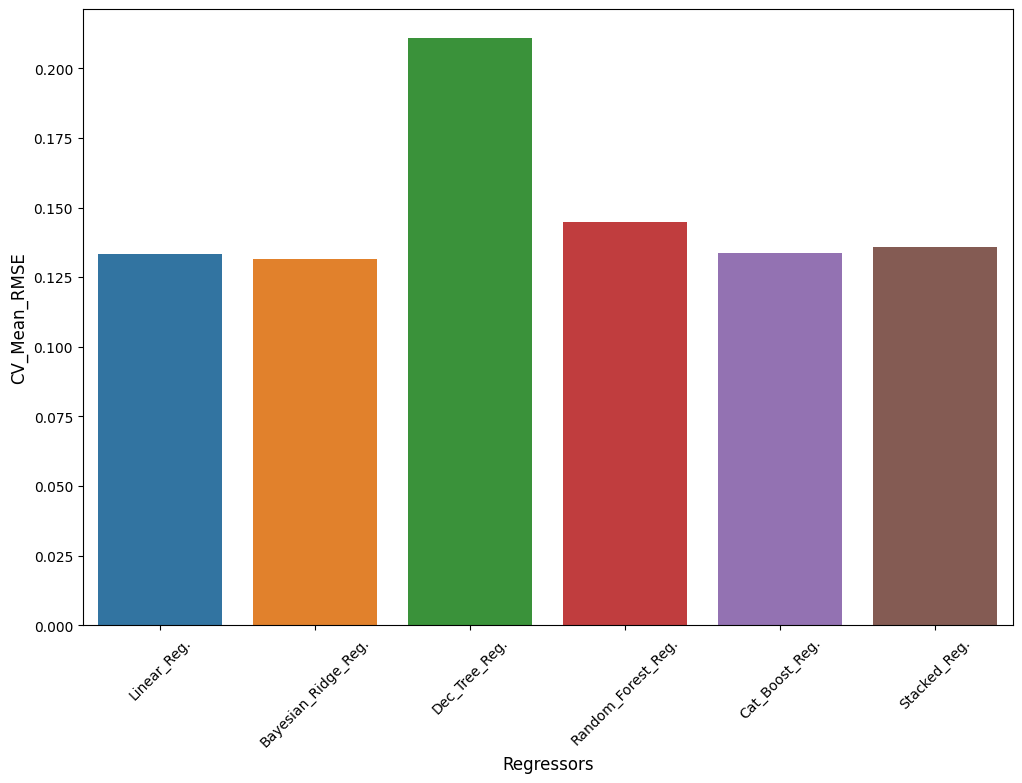

In [28]:
plt.figure(figsize = (12,8))
sns.barplot(x = final_cv_score['Regressors'],y = final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [29]:
X_train,X_val,y_train,y_val = train_test_split(train,new_target_log,test_size = 0.1,random_state=42)

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [40]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
print("cat score: ", cat_score)

cat score:  0.1309065960943929


In [31]:
feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,OverallQual,15.643708
1,Total_Home_Quality,9.971465
2,YearBuilt,9.033172
3,GrLivArea,7.991044
4,HighQualSF,7.909078
5,TotalBsmtSF,7.226066
6,GarageArea,5.700669
7,1stFlrSF,3.811647
8,BsmtFinSF1,3.687352
9,LotFrontage,2.603545


# Hyperparameter Optimization with Randomized Search

To discover the optimal CatBoost parameters tailored to our dataset, we employ the "randomized_search" function. This function systematically explores different hyperparameter combinations, ultimately plotting a graph to pinpoint the configuration that yields the lowest Root Mean Square Error (RSME).

Subsequently, these finely-tuned hyperparameters, specifically a depth of 6, learning rate of 0.05, l2_leaf_reg of 5, and 6000 iterations, will be integrated into the final CatBoost Regressor.

This meticulous hyperparameter selection process ensures that our model is finely-tuned to deliver the best possible performance on the given dataset.

In [34]:
# Performing a Random Grid Search to find the best combination of parameters

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
randomized_search_result = final_model.randomized_search(grid,
                                                   X = X_train,
                                                   y= y_train,
                                                   verbose = False,
                                                   plot=True)

# Final CatBoost Parameters

In addition to incorporating insights from the "randomized_search", the verbose parameter is now set to 200. This ensures that training information will be provided at intervals of 200 iterations, allowing for efficient monitoring of the training process.

Furthermore, the early_stopping_rounds parameter is established at 200. This mechanism acts as a safeguard, halting the training process if performance fails to improve for a specified number of consecutive iterations. This not only conserves computational resources but also prevents prolonged training without discernible enhancement in results.

As a result of these strategic parameter adjustments, a remarkable catf_score of 0.1072(4 s.f.) has been achieved. This reflects the model's exceptional predictive accuracy and efficiency.

In [35]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.05,
          'depth': 6,
          'l2_leaf_reg': 5,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 500,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [36]:
print("Catf Score:", catf_score)

Catf Score: 0.13454880761715107


# Results Analysis

To assess the model's efficacy, an in-depth analysis was conducted. This involved predicting the SalesPrice for the training data and subsequently comparing it with the actual SalesPrice values. The resulting median accuracy achieved an impressive 99.6%. However, such a high accuracy score prompts considerations about potential overfitting.

As a precautionary measure, it is advisable to focus on utilizing only the top 10 features with the highest correlation. This targeted approach aims to enhance the model's generalization capability. Furthermore, the newly engineered features, while showing promise, necessitate thorough validation to confirm their contribution to improved accuracy before their integration into the model. This rigorous validation process will optimize the model's performance while mitigating the risk of overfitting.

But for now, this result will be used for the Kaggle submission.

In [37]:
validation_pred = cat_f.predict(validation)
validation_pred = np.expm1(validation_pred)
new_sub = pd.DataFrame(train_id[1168:1460], columns = ['Id'])
new_sub['PredSalePrice'] = validation_pred
new_sub['True SalePrice'] = target[1168:1460]

new_sub.head()
avg_accuracy = (new_sub['PredSalePrice']/new_sub['True SalePrice']) * 100
print(avg_accuracy.median())

98.94245706208875


# Preparing CSV Submission File

In the final step of the process, we utilize the trained CatBoost regressor model to generate predictions. The use of np.expm1(test_pred) is essential to revert the predictions back to their original scale, as the target variables were initially logarithmically transformed to address skewness.

Subsequently, the DataFrame is converted into a CSV file format, ready for submission to Kaggle. This submission resulted in a commendable score of 0.1287. This step marks the culmination of the model deployment and evaluation process.

In [38]:
# Test CSV Submission

test_pred = cat_f.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,128530.103620
1,1462,151629.944650
2,1463,174171.857625
3,1464,188424.822730
4,1465,198012.549905


In [39]:
# Saving the results in a csv file

submission.to_csv("result.csv", index = False, header = True)